Hello, this notebook have 2 section, first section it's demonstrate simple quantum inteference, and for second section we'll using Bernstein-Vazirani Algorithm
for searching a random generated string sequence. For first time using this code please uncomment first line and change API key to your API key, thanks. :)

In [ ]:
#!pip3 install qiskit numpy matplotlib 'qiskit[visualization]' pylatexenc  #need to run when first time using colab

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table

In [ ]:
from qiskit import Aer, execute, assemble, IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
#Don't change the API code just leave it there, if you want to change it please use your own API code
IBMQ.save_account('0c9a1d874777ab30af06c0e6e8aa76f8f01ec0d8b374285586516216e230e485cd9f6410c86e5796b44d9c510e7e436b561cff44bb342078a3aca23d73881023')
IBMQ.load_account()
import qiskit as q
import numpy as np
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
%matplotlib inline

configrc.store_credentials:WARNING:2021-04-11 07:34:45,015: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-04-11 07:34:45,393: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
statevector_sim = Aer.get_backend('aer_simulator_statevector') #this is statevector simulator
Qasm_sim = Aer.get_backend('qasm_simulator')  #this is openQASM simulator

In [ ]:
circuit = q.QuantumCircuit(1,1) #create a circuit with 1 qubit and 1 bit
circuit.reset(0)  #apply |0> state or just reset the qubit
circuit.h(0)  #aplly hadamard gate to first circuit
circuit.barrier(0)  #add an barrier just fancy thing
circuit.h(0)  #apply hadamard gate again to first circuit
circuit.measure(0,0)  #measure all possible probability

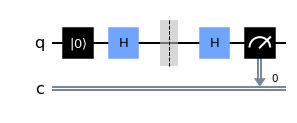

In [ ]:
circuit.draw('mpl') # draw the circuit

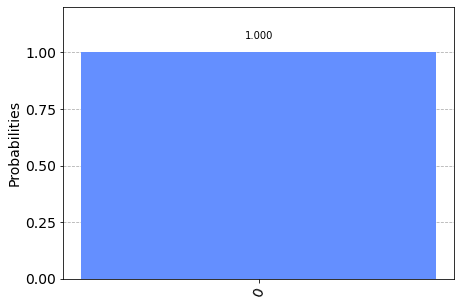

In [ ]:
job = execute(circuit,statevector_sim)  #execute circuit to simulator
result = job.result() #get result from simulator
counts = result.get_counts(circuit) #get count from simulator output
graph=plot_histogram(counts)  #plot count histogram
display(graph) #display the graph

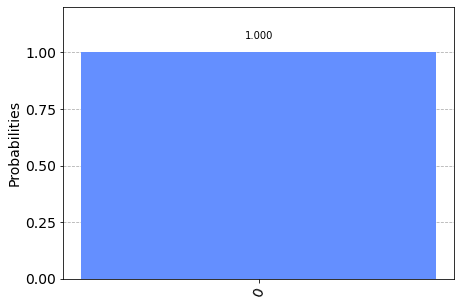

In [ ]:
job = execute(circuit,Qasm_sim)  #execute circuit to simulator
qobj = assemble(circuit, shots=8192)  #assembly the circuit and set the shots / epoch
job = Qasm_sim.run(qobj)  #run the job rto QASM simulator
hist = job.result().get_counts() #get the result and count it
plot_histogram(hist) #plot the histogram

Job Status: job has successfully run


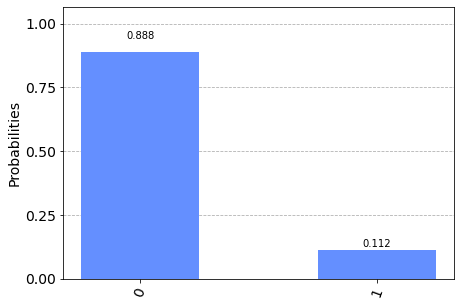

In [ ]:
#try to run in real quantum device ATTENTION: DON't RUN MULTIPLE TIME BECAUSE IT WILL FLOOD THE
#QUANTUM DEVICE AND MY API
provider = IBMQ.get_provider('ibm-q') #get real device provider
device = provider.get_backend('ibmq_5_yorktown')  #set to IBMQ_5_YORKTOWN device
job = execute(circuit, backend=device, shots=1024)  #set circuit want to run
job_monitor(job, interval = 2)  #set the jobs monitor
result = job.result() #get the result
counts = result.get_counts(circuit) #get the count
plot_histogram(counts)  #plot the counts

In [ ]:
#After simple demonstration of quantum intefrence we try implement inteference to our application
#using Bernstein - Vazirani Algorithm (inpired by https://www.jrussellhuffman.com/joyvazirani/)

In [ ]:
device = provider.get_backend('ibmq_16_melbourne')

Section 2 Implementation Bernstein-Vazirani Algorithm

In [ ]:
import random
import string

In [ ]:
n = 7 #we must constraint it to 7 qubits

In [ ]:
letter = string.ascii_letters #invoke random string letters
random_letter = ''.join(random.choice(letter) for i in range (n)) #append to whitespace and store it to variable
print(random_letter) #just print out for selection [0,1,2,3,4,5,6]

LdEEyjr


In [ ]:
x = int(input("what character you want to search ? 0-6 :\n")) #you can pick one of seven character

what character you want to search ? 0-6 :
2


In [ ]:
byte_arr = bytearray(random_letter, "utf8") #return random array to byte array
byte_list = []  #invoke empty list

With byte list we can use that for sanity check for later

In [ ]:
for byte in byte_arr:
  binary_representation = bin(byte) #convert 1 by 1 all byte array to binary
  byte_list.append(binary_representation[9-n:]) #cut unnecessary 0x0 in front
print(byte_list)
circuit_arr = []  #invoke circuit array

['1001100', '1100100', '1000101', '1000101', '1111001', '1101010', '1110010']


In [ ]:
length = len(byte_list) #get the lenght

In [ ]:
for i in range (length):
  s = byte_list[i]
  bv_circuit = QuantumCircuit(n+1, n)
  #Set dispossable/ancilla qubit to |-> state
  bv_circuit.h(n)
  bv_circuit.z(n)
  # make a superposition before we gave it to oracle
  for i in range (n):
    bv_circuit.h(i)
  #apply a barrier
  bv_circuit.barrier()
  #apply inner product / tensor product / kronker product oracle
  s = s[::-1]
  for q in range(n):
    if s[q] == '0':
      bv_circuit.i(q)
    else:
      bv_circuit.cx(q,n)
  #apply barrier
  bv_circuit.barrier()
  #return or disable a superposition
  for i in range(n):
    bv_circuit.h(i)
  #finally we measure it
  for i in range(n):
    bv_circuit.measure(i,i)

  circuit_arr.append(bv_circuit)

snippet of code below it's invoking oracle for our bit string which oracle is a black box for this problem. In this blackbox if the bit from bit string is 0, it will apply I gate (it's identity matrix), if is 1 it will apply CX/CNOT gate. This method will push right result up high
```
  #apply inner product / tensor product / kronker product oracle
  s = s[::-1]
  for q in range(n):
    if s[q] == '0':
      bv_circuit.i(q)
    else:
      bv_circuit.cx(q,n)
```



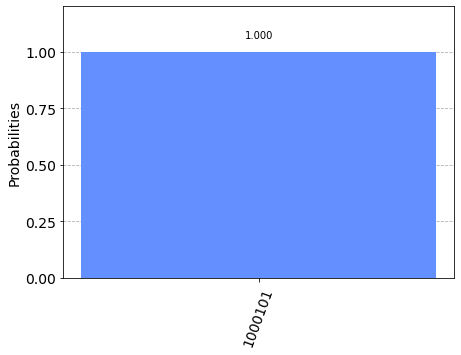

In [ ]:
backend = Aer.get_backend('aer_simulator')
shots = 4096
results = execute(circuit_arr[x], backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

Job Status: job has successfully run


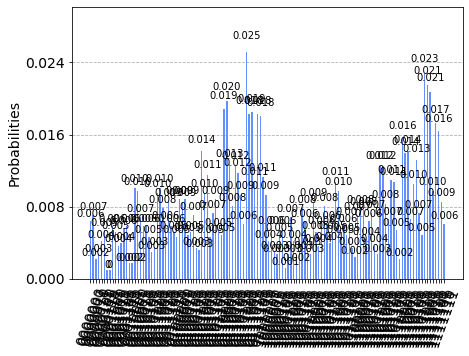

In [ ]:
job = execute(circuit_arr[x], backend=device, shots=4096)
job_monitor(job, interval=2)
result = job.result()
ans = result.get_counts(circuit_arr[x])
plot_histogram(ans)